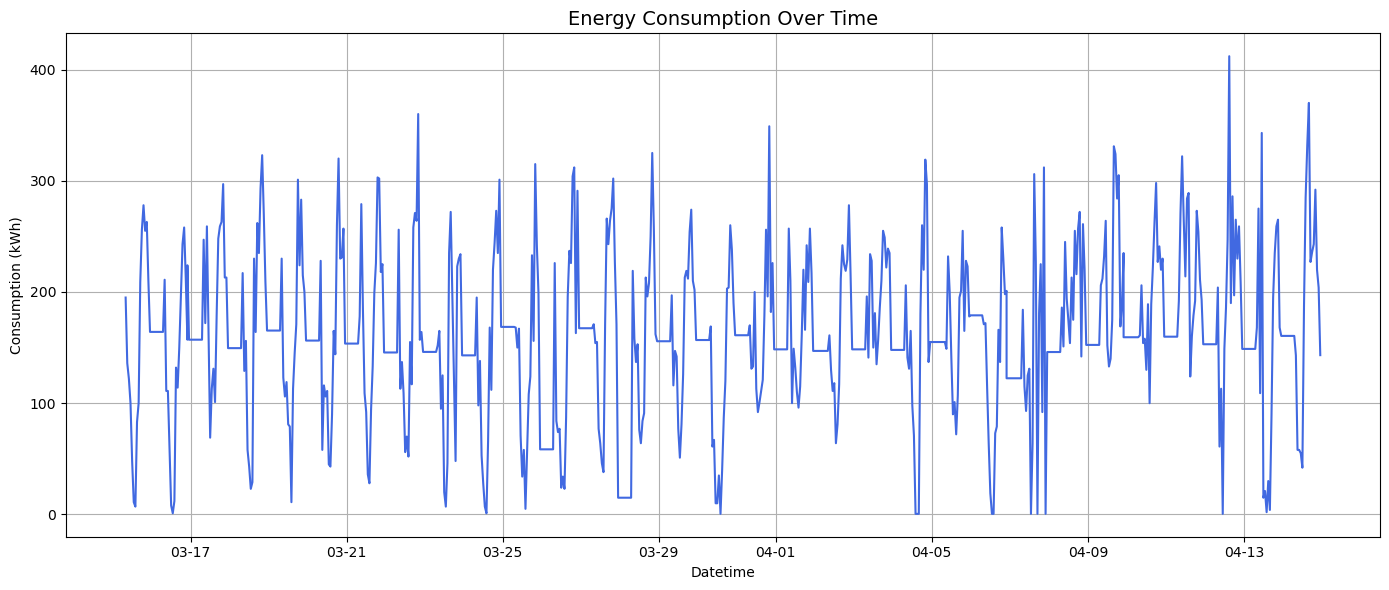

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter


file_path = "E:/final.csv"
df = pd.read_csv(file_path)


df['Datetime'] = pd.to_datetime(df['Datetime'], format='%m/%d/%Y %H:%M')
df.sort_values('Datetime', inplace=True)


df['Consumption'] = df['Consumption'].ffill()

plt.figure(figsize=(14, 6))
plt.plot(df['Datetime'], df['Consumption'], color='royalblue')
plt.title('Energy Consumption Over Time', fontsize=14)
plt.xlabel('Datetime')
plt.ylabel('Consumption (kWh)')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(DateFormatter("%m-%d"))
plt.tight_layout()
plt.show()



Solar vs Non-Solar Consumption Summary:
             mean_consumption  total_consumption  hours       cost
period                                                            
Day (Solar)        144.841103            57791.6    399  745511.64
Night              178.027378            61775.5    347  796903.95


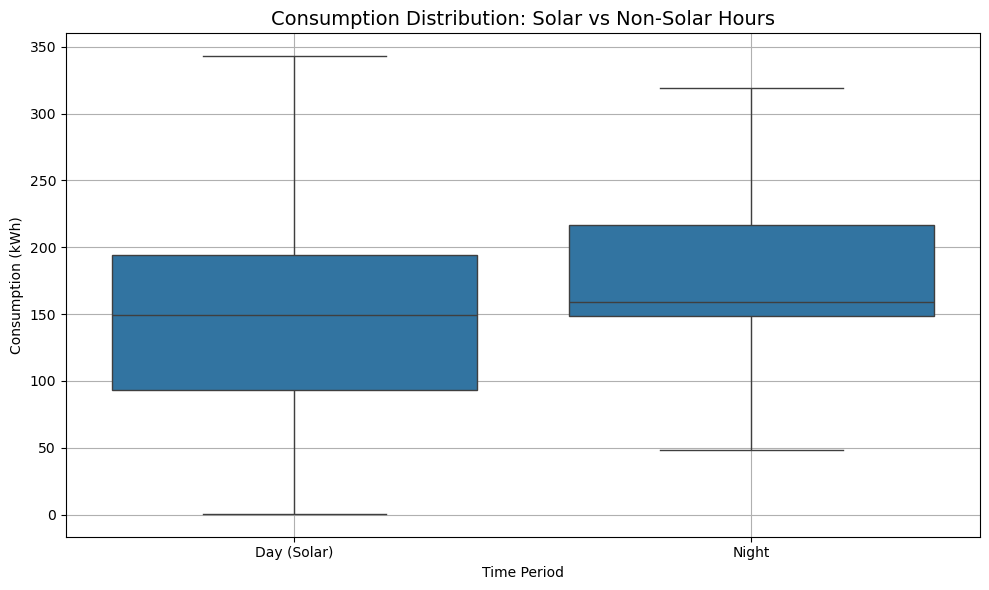

In [5]:
import numpy as np
import seaborn as sns


df['Hour'] = df['Datetime'].dt.hour


df['period'] = np.where((df['Hour'] >= 6) & (df['Hour'] <= 18), 'Day (Solar)', 'Night')


period_analysis = df.groupby('period').agg({
    'Consumption': ['mean', 'sum', 'count']
})
period_analysis.columns = ['_'.join(col).strip() for col in period_analysis.columns.values]
period_analysis = period_analysis.rename(columns={
    'Consumption_mean': 'mean_consumption',
    'Consumption_sum': 'total_consumption',
    'Consumption_count': 'hours'
})
period_analysis['cost'] = period_analysis['total_consumption'] * 12.9

print("\nSolar vs Non-Solar Consumption Summary:")
print(period_analysis)

plt.figure(figsize=(10, 6))
sns.boxplot(x='period', y='Consumption', data=df, showfliers=False)
plt.title('Consumption Distribution: Solar vs Non-Solar Hours', fontsize=14)
plt.xlabel('Time Period')
plt.ylabel('Consumption (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()


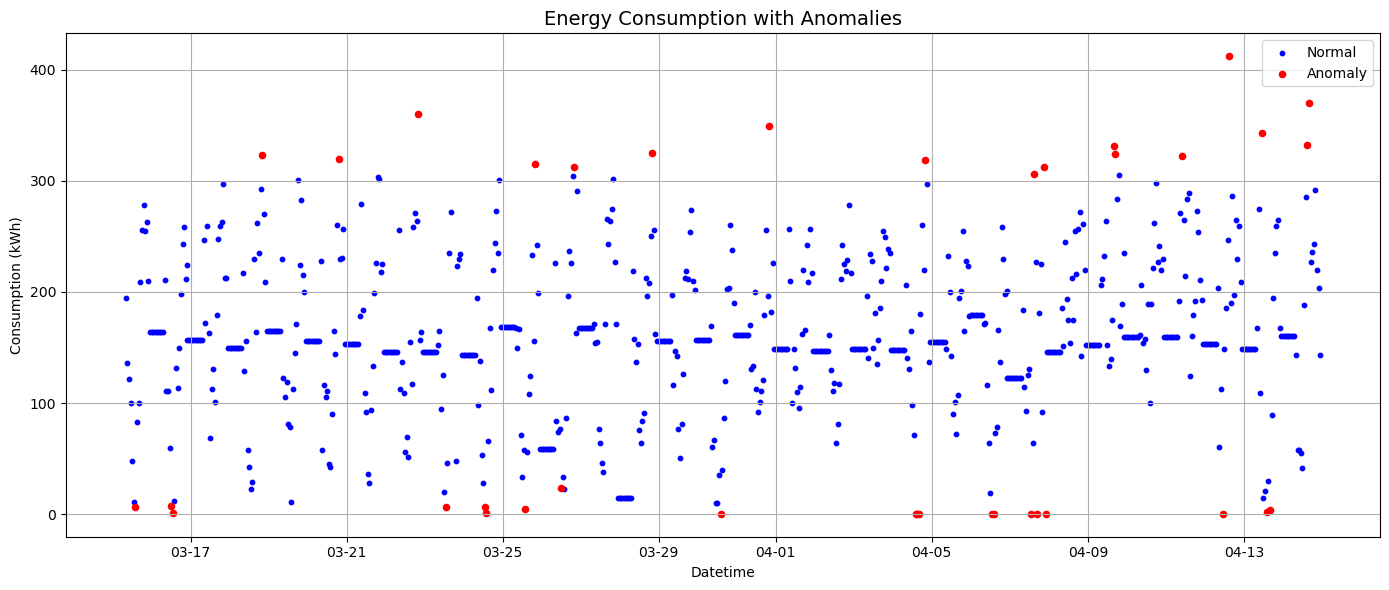


Anomaly Statistics by Hour:
      count        mean
Hour                   
14.0      7    2.357143
20.0      7  329.000000
13.0      5    3.200000
15.0      4  262.625000
16.0      4  176.375000
11.0      2  171.750000
12.0      2   16.000000
17.0      2  162.250000
10.0      1  322.000000
19.0      1  320.000000


In [7]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest on Consumption
clf = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = clf.fit_predict(df[['Consumption']]) == -1

plt.figure(figsize=(14, 6))
plt.scatter(df.loc[~df['anomaly'], 'Datetime'], df.loc[~df['anomaly'], 'Consumption'], 
            color='blue', label='Normal', s=10)
plt.scatter(df.loc[df['anomaly'], 'Datetime'], df.loc[df['anomaly'], 'Consumption'], 
            color='red', label='Anomaly', s=20)
plt.title('Energy Consumption with Anomalies', fontsize=14)
plt.xlabel('Datetime')
plt.ylabel('Consumption (kWh)')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(DateFormatter("%m-%d"))
plt.tight_layout()
plt.show()

print("\nAnomaly Statistics by Hour:")
print(df[df['anomaly']].groupby('Hour')['Consumption'].agg(['count', 'mean']).sort_values('count', ascending=False).head(10))
